In [2]:
library(ade4)
library(adegraphics)
library(dplyr)

Registered S3 methods overwritten by 'adegraphics':
  method         from
  biplot.dudi    ade4
  kplot.foucart  ade4
  kplot.mcoa     ade4
  kplot.mfa      ade4
  kplot.pta      ade4
  kplot.sepan    ade4
  kplot.statis   ade4
  scatter.coa    ade4
  scatter.dudi   ade4
  scatter.nipals ade4
  scatter.pco    ade4
  score.acm      ade4
  score.mix      ade4
  score.pca      ade4
  screeplot.dudi ade4


Attaching package: ‘adegraphics’


The following objects are masked from ‘package:ade4’:

    kplotsepan.coa, s.arrow, s.class, s.corcircle, s.distri, s.image,
    s.label, s.logo, s.match, s.traject, s.value, table.value,
    triangle.class



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# RLQ analysis of swarming and rhamnolipid production

In [3]:
tab_strain_by_phenotype <- read.csv(file = 'tab_strain_by_phenotype.csv', 
                                    row.names = 'StrainID',
                                    colClasses=c('factor'))
tab_strain_by_phenotype <- tab_strain_by_phenotype %>% select(rhamn3cats)
tab_strain_by_phenotype

,rhamn3cats
,<fct>
F22031-1,2
F22031-2,2
F22031-3,2
F30658-1,1
F30658-2,1
F30658-3,1
F34365-1,2
F34365-2,2
F34365-3,2


In [4]:
tab_gene_by_function <- read.csv(file = 'tab_gene_by_function.csv',
                                  row.names = 'GeneID',
                                  colClasses=c(rep('factor',1)))
tab_gene_by_function

,pau02020,pau00970,pau00550,pau01100,pau00785,pau01240,pau03030,pau03430,pau03440,pau00860,⋯,pau00622,pau00471,pau01053,pau00600,pau00332,pau00791,pau00473,pau00523,pau00525,pau03020
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
dnaA,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
glyQ,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
dacC,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
lipB,0,0,0,1,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
holA,0,0,0,0,0,0,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
leuS,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
hemL,0,0,0,1,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
thiE,0,0,0,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
thiD,0,0,0,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
tab_strain_by_gene <- read.csv(file = 'tab_strain_by_gene.csv',
                               row.names = 'StrainID')
tab_strain_by_gene

,dnaA,glyQ,dacC,lipB,holA,leuS,hemL,thiE,thiD,PA14_12490,⋯,PA14_01100,PA14_11760,eutB,PA14_11810,PA14_01110,PA14_11860,PA14_11970,proA,nadD,pbpA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F22031-1,5488.498,1303.220,4475.237,1792.325,869.0786,14153.79,2078.301,736.8448,1430.674,1968.371,⋯,732.0653,560.0020,504.2408,3.982945,557.6123,742.4209,830.8423,2565.016,1258.611,1804.274
F22031-2,5612.008,1093.641,4435.932,1729.308,1471.0112,12239.80,2059.049,653.9863,1486.582,1863.037,⋯,5267.6122,525.7537,536.7450,2.747842,3222.3021,642.0790,797.7900,2107.594,1120.203,2137.821
F22031-3,5460.331,1228.574,4286.360,1917.540,1137.5689,14750.92,2015.504,714.1256,1438.422,1735.529,⋯,1217.8679,463.5928,510.7015,2.141306,920.7616,695.9245,814.2317,2668.603,1155.770,2409.505
F30658-1,7013.429,2121.225,4990.302,1940.032,1152.9398,21530.78,2203.165,879.4196,2199.703,2277.027,⋯,219.2778,378.5428,490.4899,9.232752,138.4913,746.6988,1253.3460,3866.215,1986.196,2638.259
F30658-2,7369.798,1926.737,6500.855,2050.706,1759.9000,23770.82,3257.958,816.8068,2097.050,2446.945,⋯,202.7535,293.1236,457.6435,4.634365,162.2028,859.6747,1311.5252,3428.271,2262.729,3567.302
F30658-3,8112.553,2273.472,6325.432,2120.948,1519.4849,24497.38,3259.123,860.4659,1965.546,2372.756,⋯,208.6414,404.3326,597.1461,4.316719,156.8408,795.7151,1169.8307,4367.080,2102.242,3002.997
F34365-1,8189.181,2027.094,4228.832,1666.509,989.6528,18033.58,1846.367,757.6622,1965.404,1265.956,⋯,1338.9420,403.1597,399.6842,3.475515,1096.5249,750.7112,1206.0036,3909.954,2040.996,2933.334
F34365-2,6996.925,1602.759,5493.470,2021.819,1977.1327,16638.30,2581.891,772.5812,1939.397,1448.838,⋯,7749.6453,571.9882,616.6747,4.965175,3807.2963,877.8430,1086.3803,3018.826,1689.153,3848.011
F34365-3,6665.686,1637.704,4479.072,1838.725,1447.3499,14887.03,1992.978,658.0355,1881.391,1344.788,⋯,3189.2567,576.8067,615.3698,2.461479,2447.5310,725.3159,1169.2027,3025.979,1439.145,3231.922


In [32]:
coa1 <- dudi.coa(tab_strain_by_gene, scannf = FALSE)
coa1

Duality diagramm
class: coa dudi
$call: dudi.coa(df = tab_strain_by_gene, scannf = FALSE)

$nf: 2 axis-components saved
$rank: 32
eigen values: 0.04699 0.03547 0.02523 0.02114 0.0185 ...
  vector length mode    content       
1 $cw    1474   numeric column weights
2 $lw    33     numeric row weights   
3 $eig   32     numeric eigen values  

  data.frame nrow ncol content             
1 $tab       33   1474 modified array      
2 $li        33   2    row coordinates     
3 $l1        33   2    row normed scores   
4 $co        1474 2    column coordinates  
5 $c1        1474 2    column normed scores
other elements: N 

In [33]:
dudiphe <- dudi.hillsmith(tab_strain_by_phenotype, scannf = FALSE, row.w = coa1$lw)
dudiphe

Duality diagramm
class: mix dudi
$call: dudi.hillsmith(df = tab_strain_by_phenotype, row.w = coa1$lw, 
    scannf = FALSE)

$nf: 2 axis-components saved
$rank: 2
eigen values: 1 1
  vector length mode    content       
1 $cw    3      numeric column weights
2 $lw    33     numeric row weights   
3 $eig   2      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       33   3    modified array      
2 $li        33   2    row coordinates     
3 $l1        33   2    row normed scores   
4 $co        3    2    column coordinates  
5 $c1        3    2    column normed scores
other elements: assign index cr center norm 

In [34]:
dudigfunc <- dudi.acm(tab_gene_by_function, scannf = FALSE, row.w = coa1$cw)
dudigfunc

Duality diagramm
class: acm dudi
$call: dudi.acm(df = tab_gene_by_function, row.w = coa1$cw, scannf = FALSE)

$nf: 2 axis-components saved
$rank: 120
eigen values: 0.05736 0.04128 0.02997 0.02899 0.02475 ...
  vector length mode    content       
1 $cw    240    numeric column weights
2 $lw    1474   numeric row weights   
3 $eig   120    numeric eigen values  

  data.frame nrow ncol content             
1 $tab       1474 240  modified array      
2 $li        1474 2    row coordinates     
3 $l1        1474 2    row normed scores   
4 $co        240  2    column coordinates  
5 $c1        240  2    column normed scores
other elements: cr 

In [35]:
rlq1<- rlq(dudiphe, coa1, dudigfunc, scannf = FALSE)

In [36]:
rlq1

RLQ analysis
call: rlq(dudiR = dudiphe, dudiL = coa1, dudiQ = dudigfunc, scannf = FALSE)
class: rlq dudi 

$rank (rank)     : 2
$nf (axis saved) : 2

eigen values: 0.0001338 7.497e-05

  vector length mode    content                         
1 $eig   2      numeric Eigenvalues                     
2 $lw    3      numeric Row weigths (for dudiphe cols)  
3 $cw    240    numeric Col weigths (for dudigfunc cols)

   data.frame nrow ncol content                                            
1  $tab       3    240  Crossed Table (CT): cols(dudiphe) x cols(dudigfunc)
2  $li        3    2    CT row scores (cols of dudiphe)                    
3  $l1        3    2    Principal components (loadings for dudiphe cols)   
4  $co        240  2    CT col scores (cols of dudigfunc)                  
5  $c1        240  2    Principal axes (loadings for dudigfunc cols)       
6  $lR        33   2    Row scores (rows of dudiphe)                       
7  $mR        33   2    Normed row scores (rows of dud

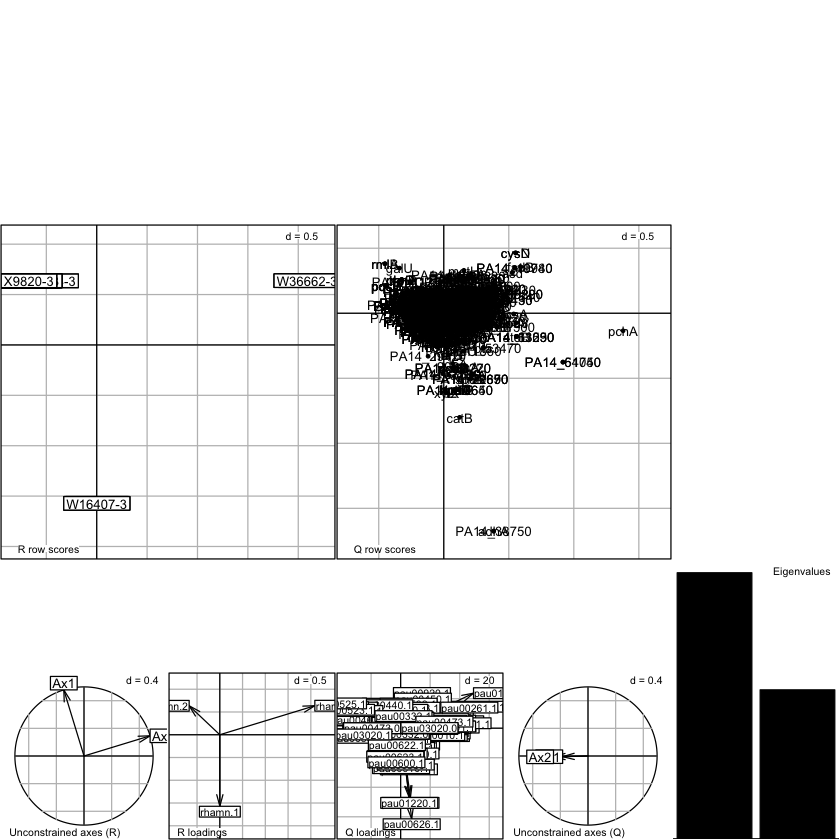

In [37]:
pl1<-plot(rlq1)

In [24]:
summary(rlq1)

RLQ analysis

Class: rlq dudi
Call: rlq(dudiR = dudiphe, dudiL = coa1, dudiQ = dudigfunc, scannf = FALSE, 
    nf = 2)

Total inertia: 0.0002088

Eigenvalues:
      Ax1       Ax2 
1.338e-04 7.497e-05 

Projected inertia (%):
    Ax1     Ax2 
   64.1    35.9 

Cumulative projected inertia (%):
    Ax1   Ax1:2 
   64.1   100.0 


Eigenvalues decomposition:
           eig       covar sdR       sdQ       corr
1 1.338424e-04 0.011569029   1 0.1644131 0.07036563
2 7.496852e-05 0.008658436   1 0.1383011 0.06260570

Inertia & coinertia R (dudiphe):
   inertia max ratio
1        1   1     1
12       2   2     1

Inertia & coinertia Q (dudigfunc):
      inertia        max     ratio
1  0.02703165 0.05735871 0.4712737
12 0.04615884 0.09864307 0.4679380

Correlation L (coa1):
        corr       max     ratio
1 0.07036563 0.2167657 0.3246161
2 0.06260570 0.1883390 0.3324097


In [25]:
write.table(rlq1$lQ, 'lQ_scores_of_genes.csv', sep=',')

In [26]:
write.table(rlq1$l1, 'l1_loadings_of_phenotype.csv', sep=',')

In [27]:
write.table(rlq1$c1, 'c1_loadings_of_pathways.csv', sep=',')

In [28]:
write.table(rlq1$lR, 'lR_scores_of_strains.csv', sep=',')

In [29]:
write.table(rlq1$eig, 'eigenvalues.csv', sep=',')

In [30]:
write.table(rlq1$aQ, 'aQ_axes_of_pathways_on_RLQ_axes.csv', sep=',')

In [31]:
write.table(rlq1$aR, 'aR_axes_of_phenotype_on_RLQ_axes.csv', sep=',')

# plot

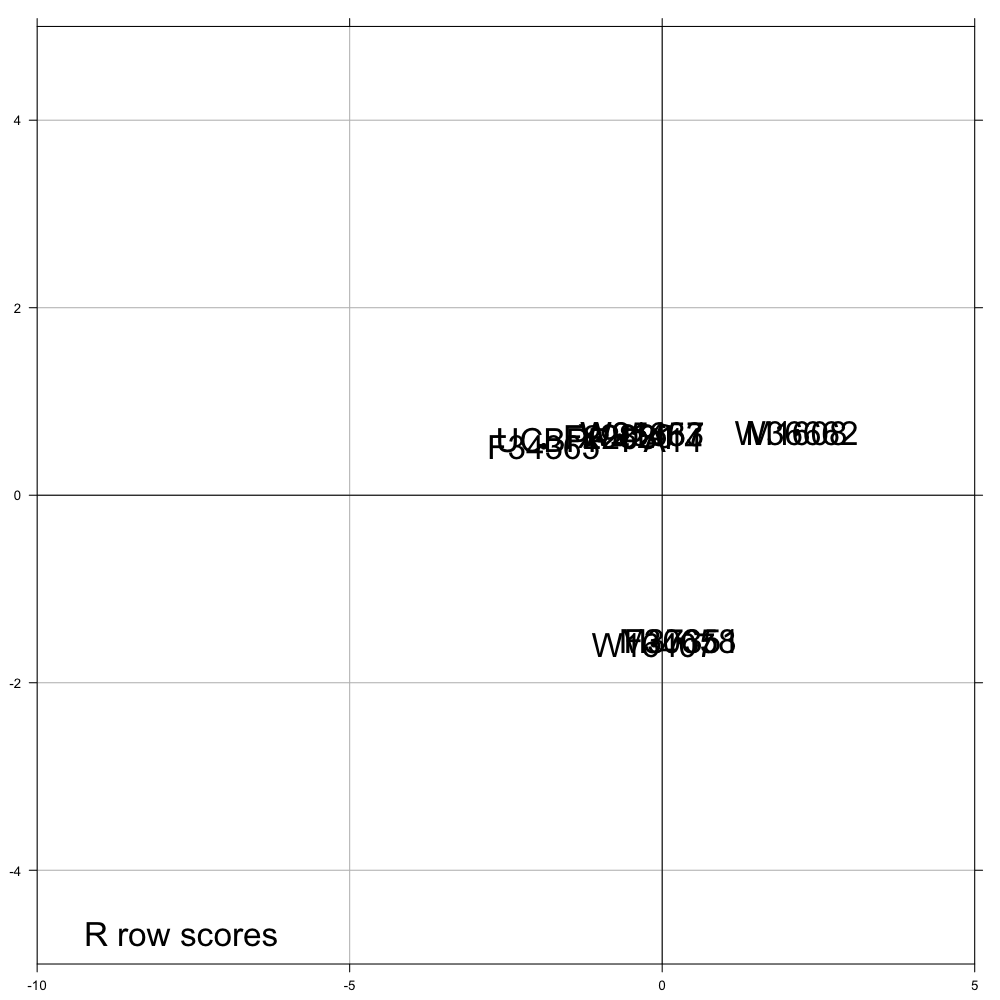

In [135]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
up2 <- update(pl1$Rrow, 
              ppoints.cex = 1, 
              psub.cex = 2,
              paxes.draw = TRUE,
              plabels=list(cex=2, box = list(draw = FALSE), xlim=c(-10,5), ylim=c(-5,5)),
              paxes.asp=1,
              plot = FALSE)
ADEgS(list(up2), layout = list(matrix(c(1, 1), nrow = 1, ncol = 1)))

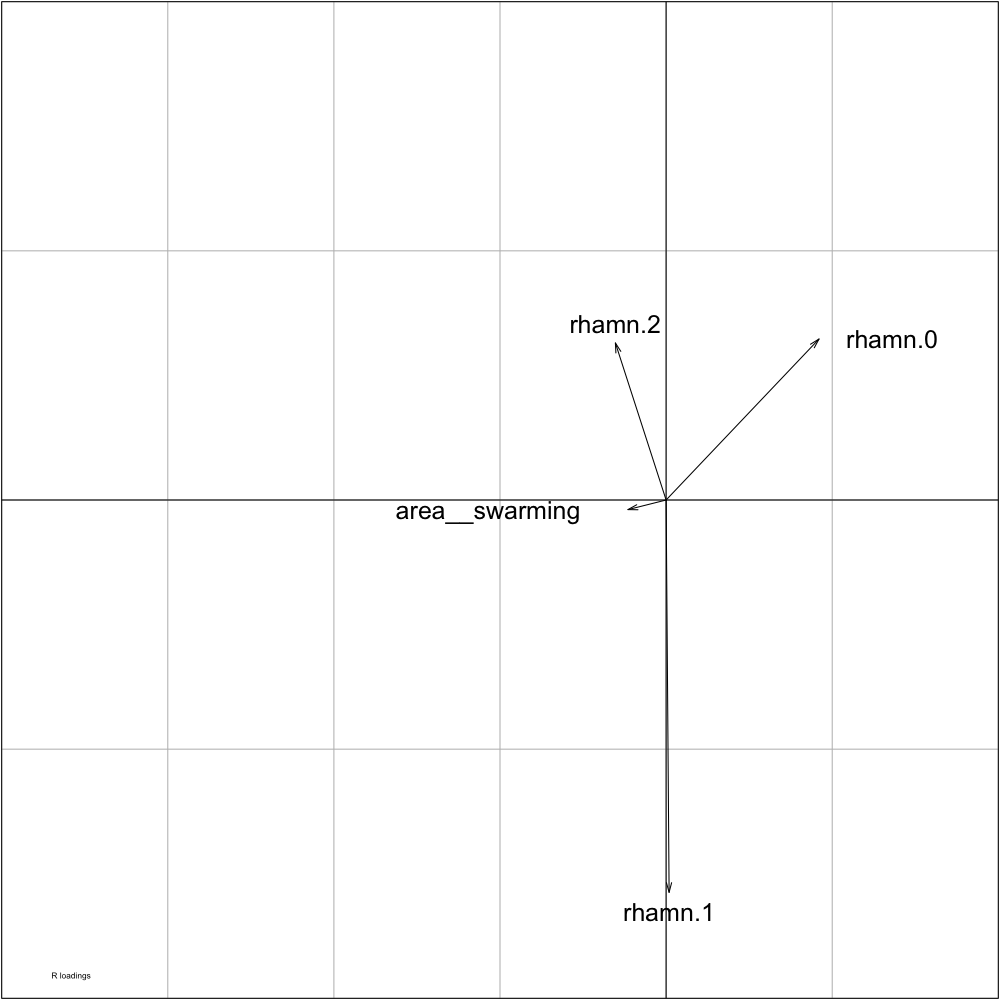

In [73]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
up3 <- update(pl1$Rloadings, 
              plabels = list(cex = 1.5, box = list(draw = FALSE), xlim=c(-8,4), ylim=c(-2,2), optim=TRUE), 
              psub.cex = 0.5, 
              paxes.asp=1,
              plot = FALSE)
ADEgS(list(up3), layout = list(matrix(c(1, 1), nrow = 1, ncol = 1, byrow = FALSE)))

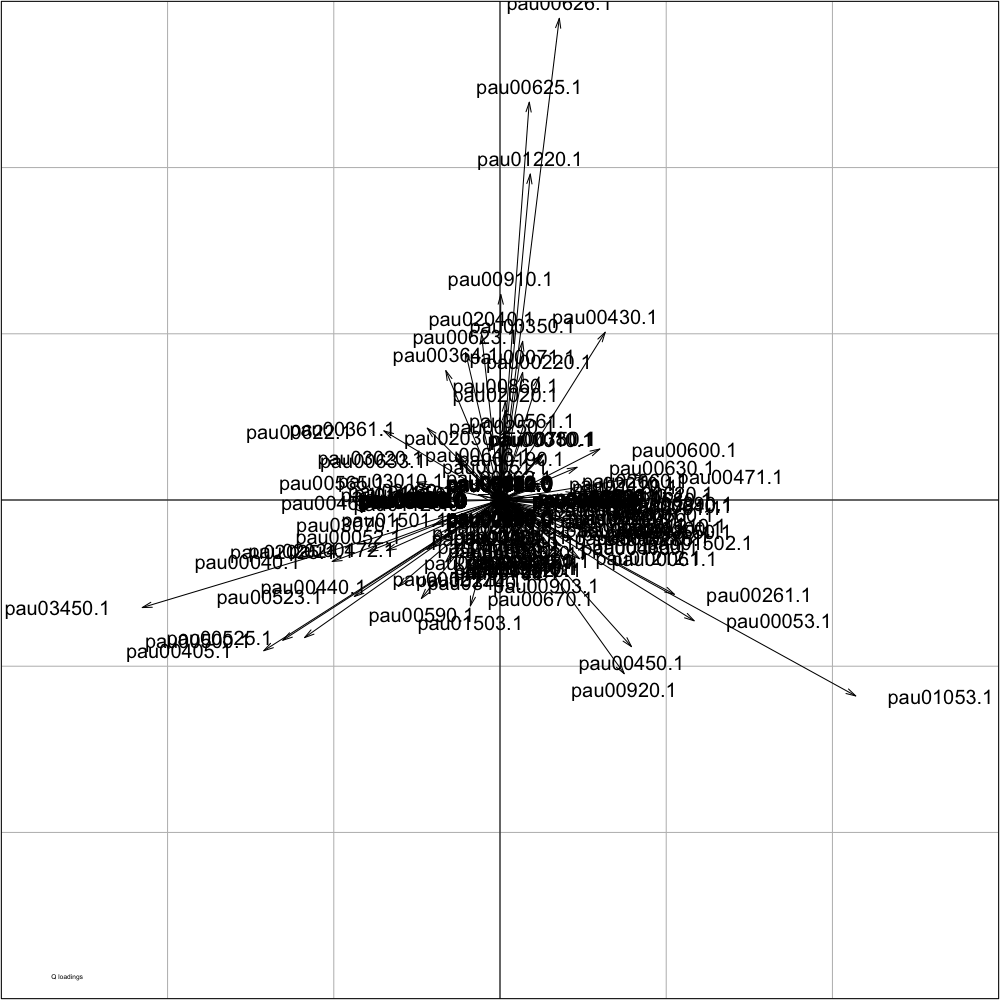

In [273]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
up3 <- update(pl1$Qloadings,
              plabels = list(cex = 1.5, box = list(draw = FALSE), xlim=c(-60,60), ylim=c(-60,60), optim=TRUE),
              psub.cex = 0.5, 
              paxes.asp=1,
              plot = FALSE)
ADEgS(list(up3), layout = list(matrix(c(1, 1), nrow = 6, ncol = 1, byrow = FALSE)))

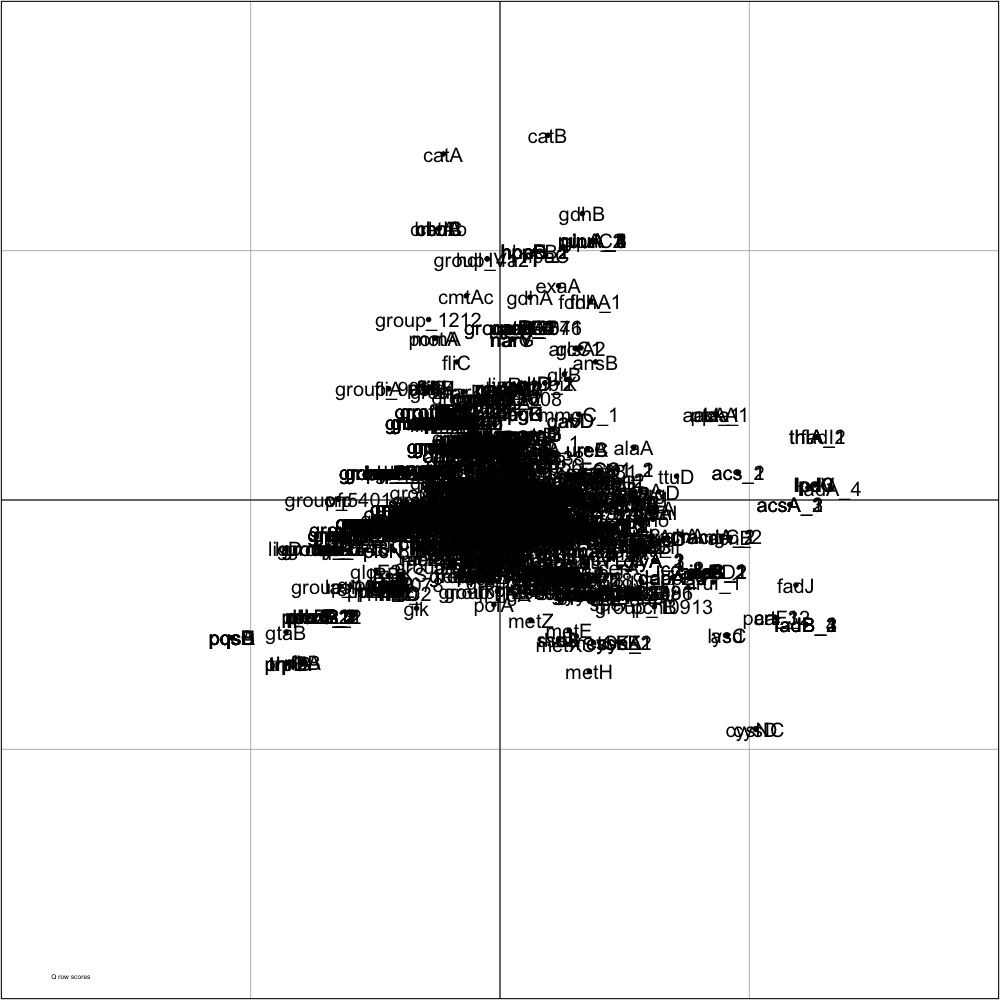

In [274]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
up4 <- update(pl1$Qrow,
              plabels = list(cex = 1.5, box = list(draw = FALSE), xlim=c(-1,1), ylim=c(-1,1)),
              psub.cex = 0.5, 
              paxes.asp=1,
              plot = FALSE)
ADEgS(list(up4), layout = list(matrix(c(1, 1), nrow = 6, ncol = 1, byrow = FALSE)))

# Cautions: maybe very slow

In [96]:
randtest(rlq1)

class: krandtest lightkrandtest 
Monte-Carlo tests
Call: randtest.rlq(xtest = rlq1)

Number of tests:   2 

Adjustment method for multiple comparisons:   none 
Permutation number:   999 
     Test          Obs   Std.Obs   Alter Pvalue
1 Model 2 0.0002089332 0.8467237 greater  0.181
2 Model 4 0.0002089332 6.9684086 greater  0.001


In [ ]:
fourthcorner.rlq(rlq1,type="Q.axes")

In [ ]:
fourthcorner.rlq(rlq1,type="R.axes")

# PCA of L table

## Scale=True (standarized, correlation matrix)

In [339]:
pca1corr <- dudi.pca(tab_samples_by_species, scale = TRUE, scannf = FALSE, nf = 2)

In [340]:
pca1corr$co

,Comp1,Comp2
,<dbl>,<dbl>
4399109,-0.1459867765,-0.7388001128
1105928,0.0022370080,0.0064240107
139279,0.0017075195,0.0048399780
163857,0.0030785194,0.0049722973
884751,0.0045412088,0.0068905421
188433,-0.0673727691,-0.1857110575
860192,-0.0863315951,-0.2121068297
344118,-0.0014917893,0.0061570933
270391,0.0032512037,0.0052848898


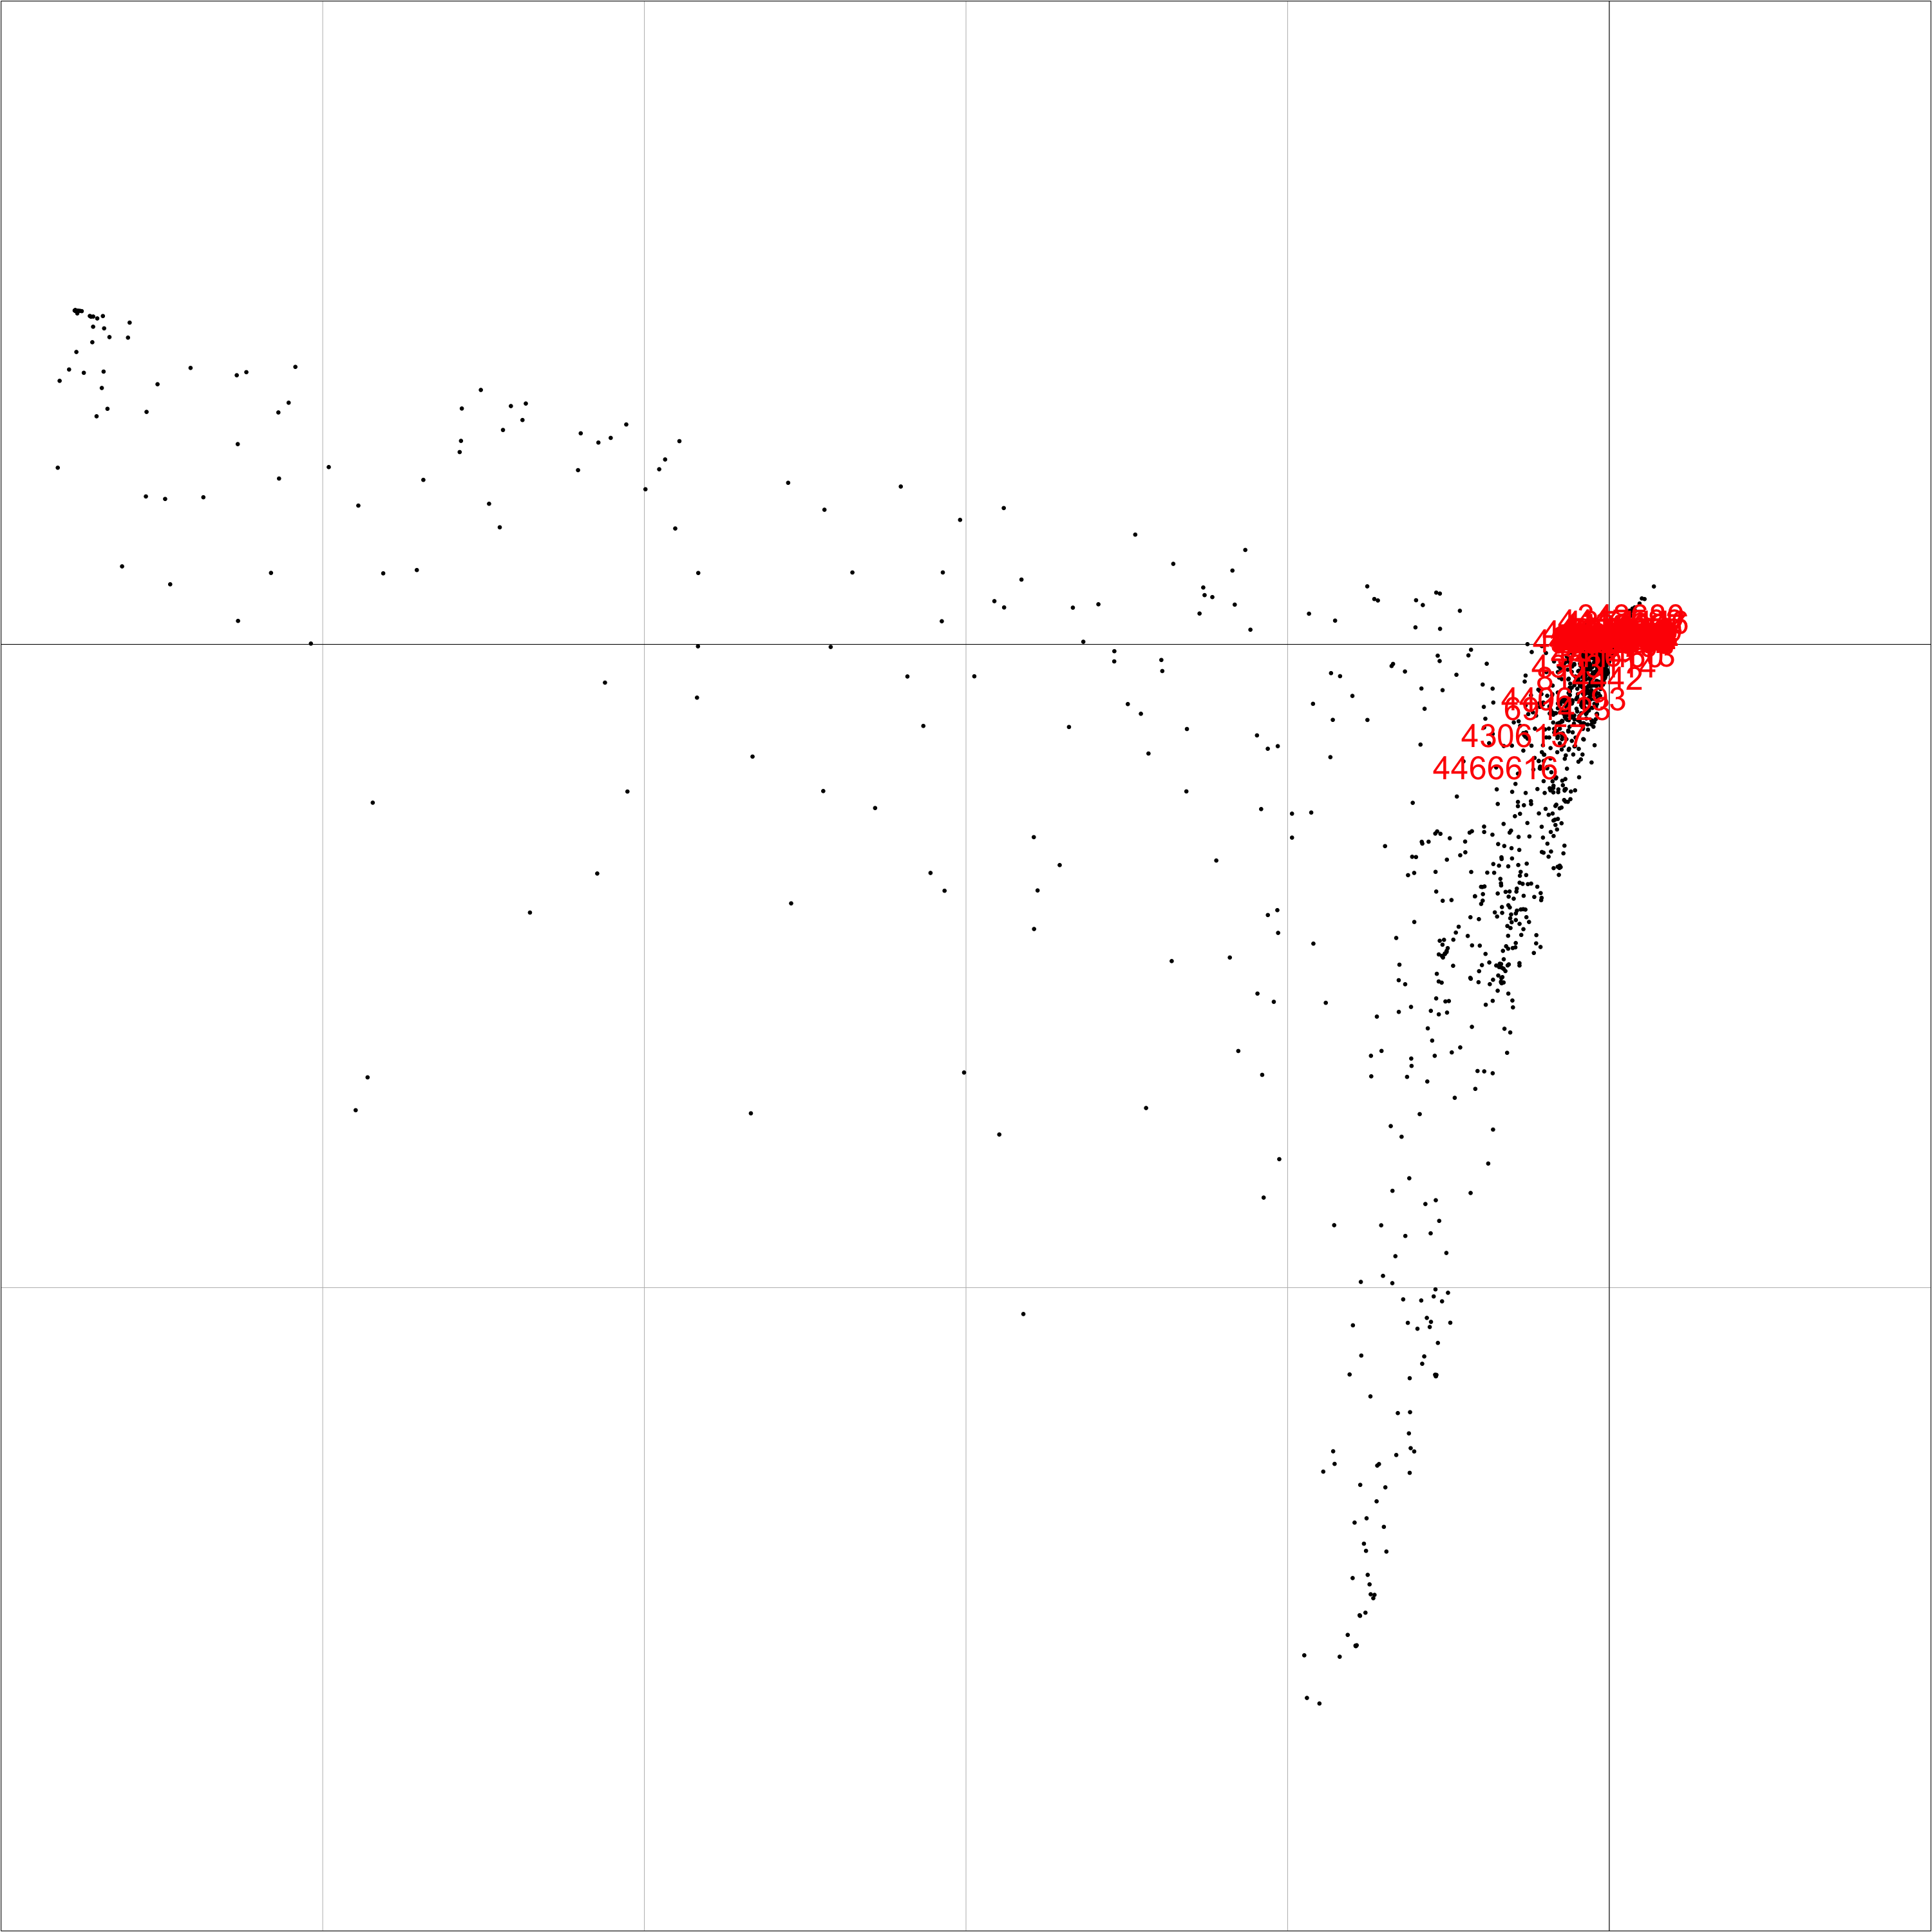

In [377]:
options(repr.plot.width = 30, repr.plot.height = 30, repr.plot.res = 100)
col <- rep("transparent", nrow(rlq1$lQ))
col[c(which(rlq1$lQ$AxcQ1 < -4),583)] <- "red"
sc1 <- s.label(pca1corr$co,
               plabels = list(cex = 3, col=col, box = list(draw = FALSE), xlim=c(-1,0.2), ylim=c(-1,0.5)),
               paxes.asp=1,
               plot = FALSE)
ADEgS(list(sc1), layout = list(matrix(c(1, 1), nrow = 1, ncol = 1, byrow = FALSE)))

## Scale=False (centering only, covariance matrix)

In [381]:
pca1cov <- dudi.pca(tab_samples_by_species, scale = FALSE, scannf = FALSE, nf = 2)

In [382]:
pca1cov$co

,Comp1,Comp2
,<dbl>,<dbl>
4399109,-5.162955e+02,2.494348e+03
1105928,3.217584e+03,9.828696e+02
139279,-3.438442e+02,-2.070723e+02
163857,2.141216e-01,-6.376287e-01
884751,-6.414513e+00,-5.034672e+00
188433,-7.764190e+02,5.470540e+03
860192,-2.678050e+02,1.427494e+03
344118,-2.968607e+01,-1.072814e+01
270391,-1.034794e-02,-7.240972e-03


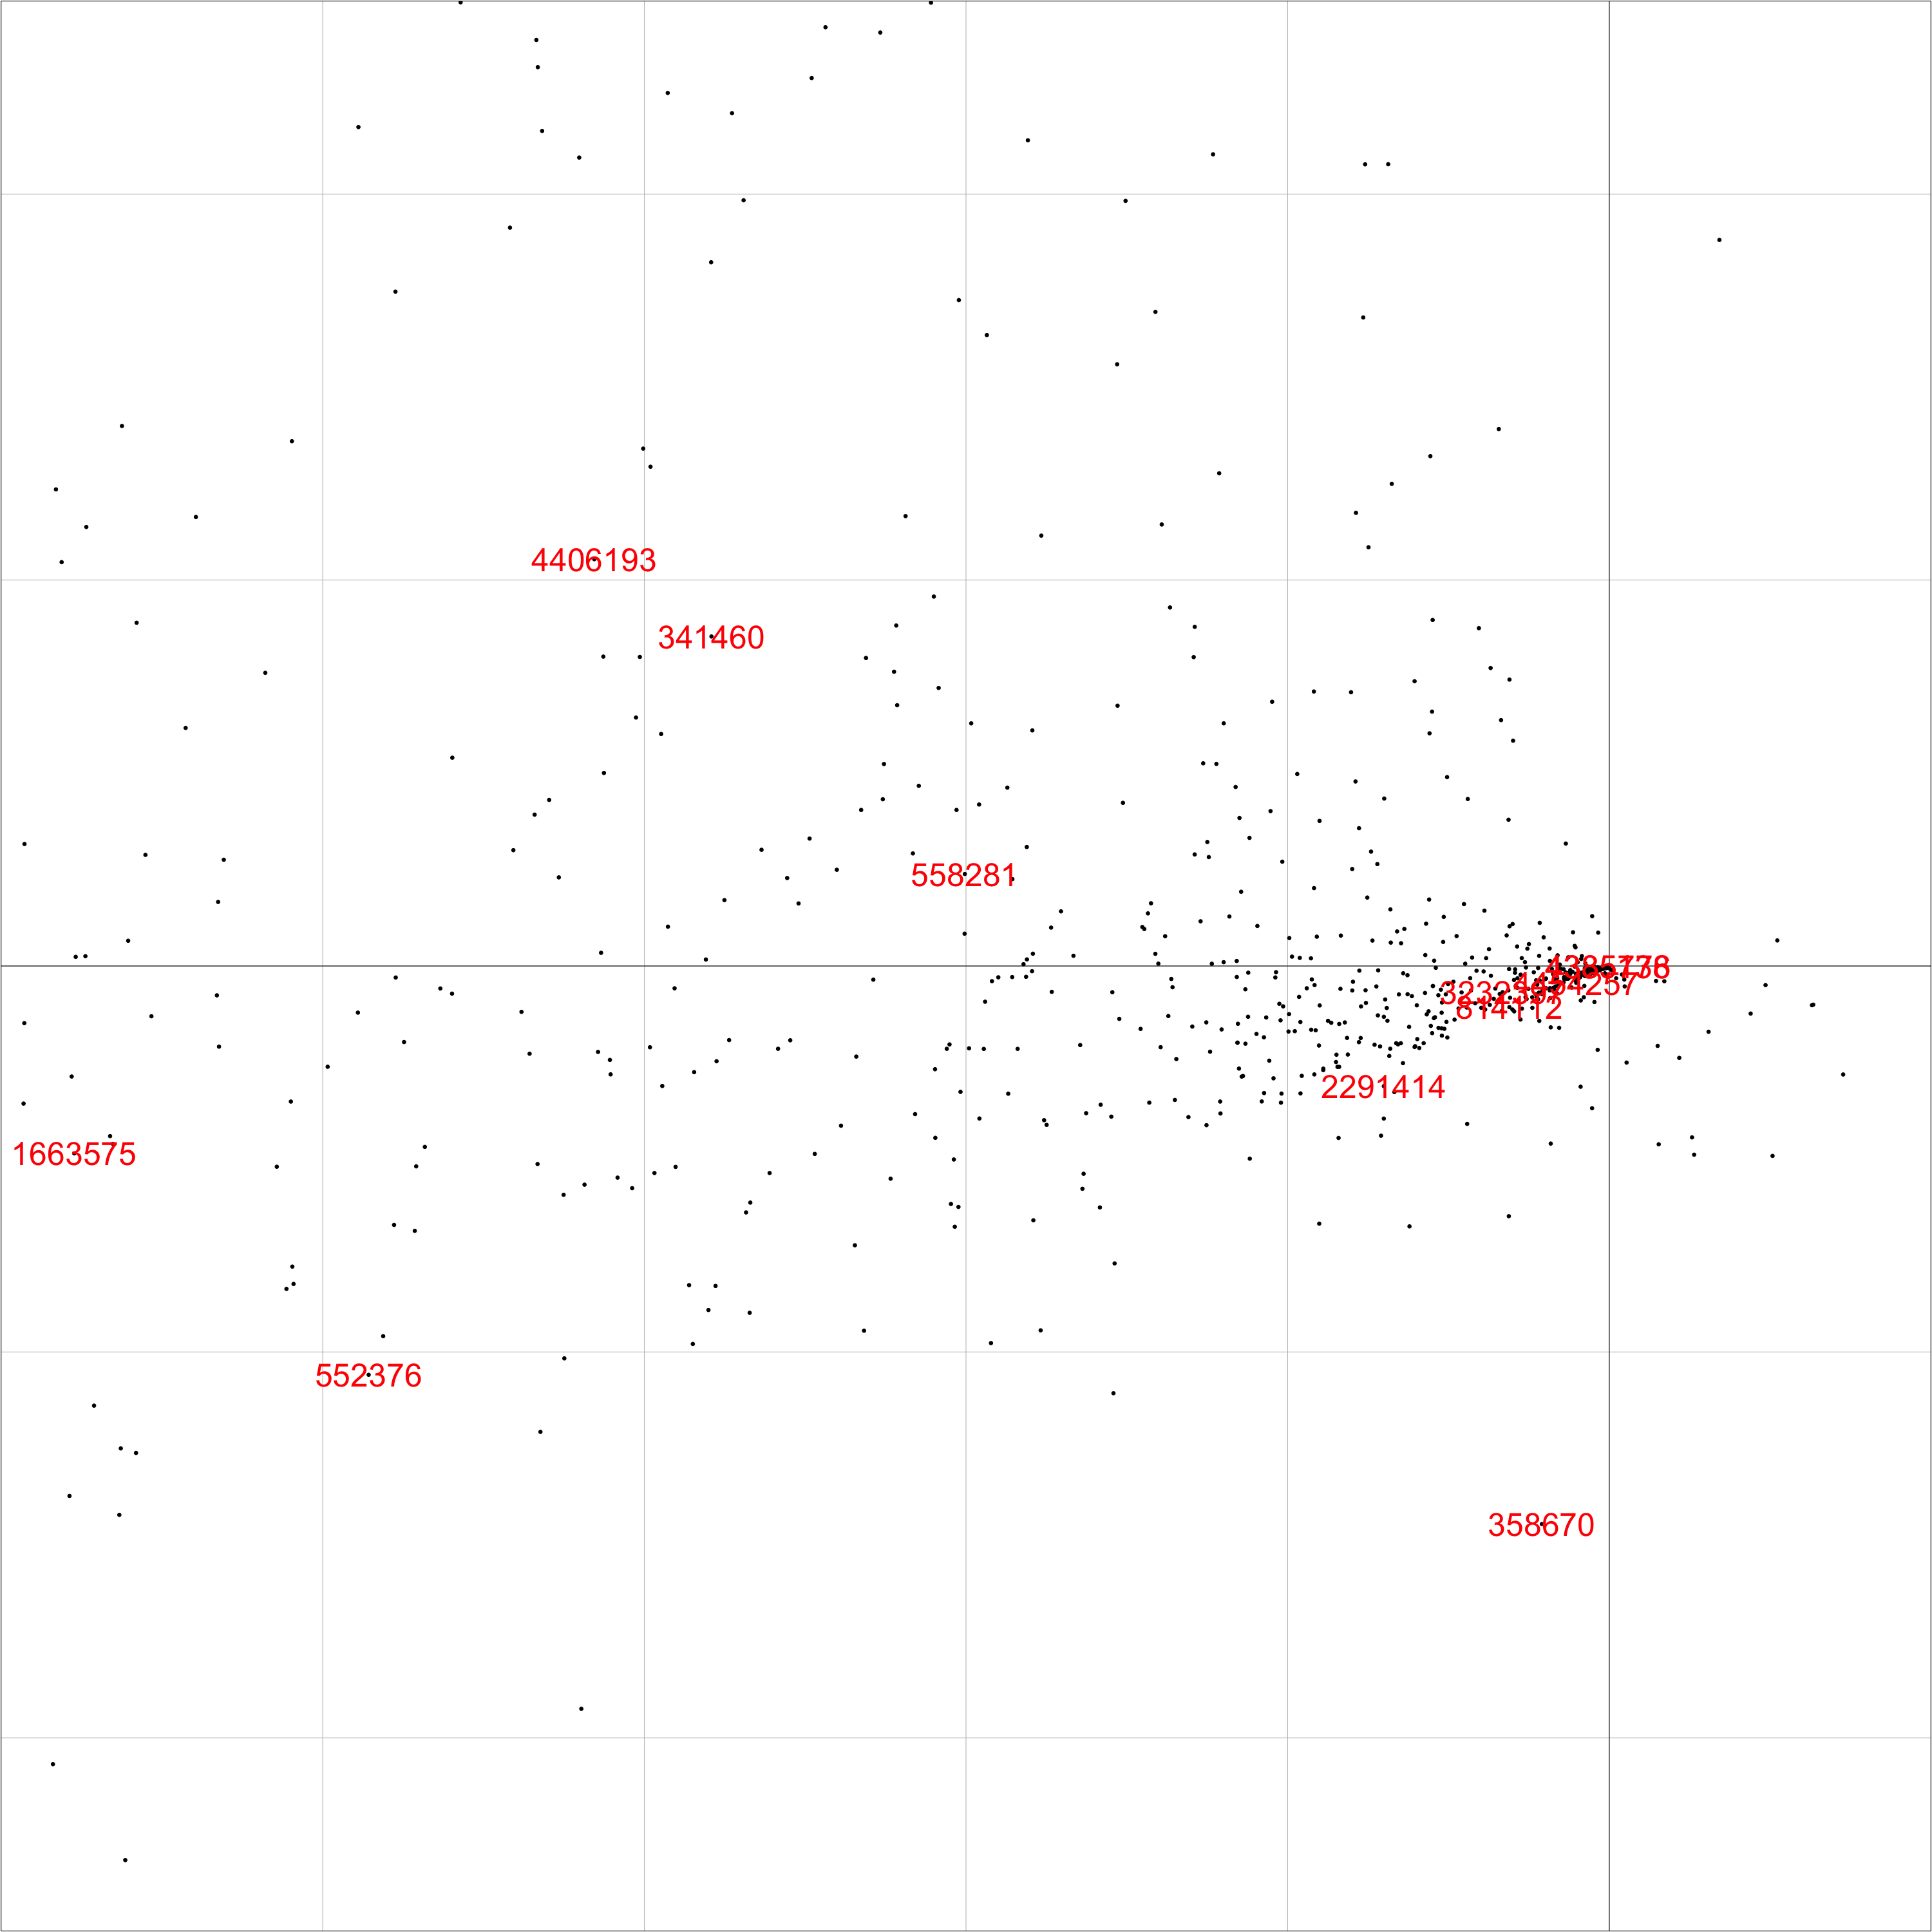

In [385]:
options(repr.plot.width = 30, repr.plot.height = 30, repr.plot.res = 100)
col <- rep("transparent", nrow(rlq1$lQ))
col[c(which(rlq1$lQ$AxcQ1 < -4),583)] <- "red"
sc1 <- s.label(pca1cov$co,
               plabels = list(cex = 3, col=col, box = list(draw = FALSE), xlim=c(-50,10), ylim=c(-50,50)),
               paxes.asp=1,
               plot = FALSE)
ADEgS(list(sc1), layout = list(matrix(c(1, 1), nrow = 1, ncol = 1, byrow = FALSE)))